<a href="https://colab.research.google.com/github/sushant8525/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## **Importing Libraries**

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import en_core_web_sm

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Loading the Dataset**
There is a total of **7787** movies / TV shows in this data set collected from **AlmaBetter**

Each row contains the following information: **type** (Movie or TV Show), **title, director, cast, country, rating** (ex. PG, PG-13, R, etc.), **listed_in** (genre), and **plot description**.

#Mount the drive and import the datset#


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
netflix = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

##top head five rows##

In [4]:
# Viewing the data of top 5 rows to take a glimps of the data
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##bottom head five rows##

In [5]:
# View the data of bottom 5 rows to take a glimps of the data
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
#check details about the data set
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
#Looking for the description of the dataset to get insights of the data
netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [10]:
#Getting the shape of dataset with rows and columns
netflix.shape

(7787, 12)

In [11]:
#Getting all the columns
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#*Preprocessing the dataset*#


##Missing values##


In [12]:
#check for count of missing values in each column.
netflix.isnull().sum()
netflix.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

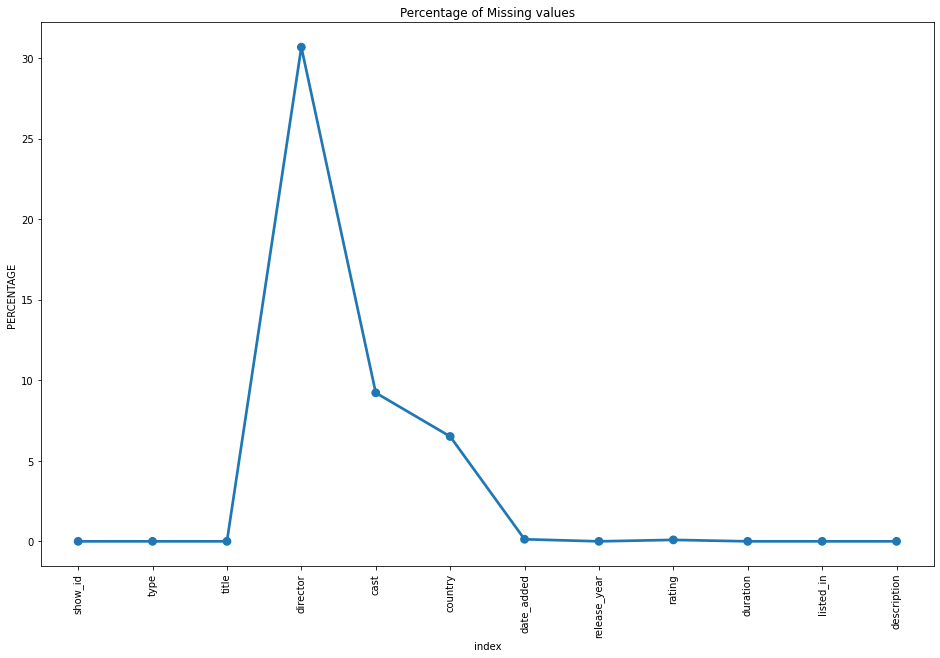

In [13]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((netflix.isnull().sum())*100/netflix.shape[0]).reset_index()
plt.figure(figsize=(16,10))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

'''dfdgdgdgdg'''gd

###Duplicate values###


In [14]:
# Checking Duplicate Values
value=len(netflix[netflix.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


 

*   In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.


## drop columns which are not required##

In [15]:
netflix_1=netflix.drop(['show_id','date_added','release_year','duration'], axis=1)
netflix_df = netflix_1.copy()
netflix_df.head()

,type,title,director,cast,country,rating,listed_in,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...


# **Natural Language Processing (NLP) Model**

For the NLP portion of this project, I will first convert all plot descriptions to word vectors so they can be processed by the NLP model. Then, the similarity between all word vectors will be calculated using cosine similarity (measures the angle between two vectors, resulting in a score between -1 and 1, corresponding to complete oppositses or perfectly similar vectors). Finally, I will extract the 5 movies or TV shows with the most similar plot description to a given movie or TV show.

In [16]:
!pip install matplotlib-venn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import spacy.cli
spacy.cli.download("en_core_web_lg")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [18]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [19]:
# Load the large model to get the vectors
!nlp = spacy.load('en_core_web_lg')

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `nlp = spacy.load('en_core_web_lg')'


In [20]:
# Create word vectors for all movie and TV show descriptions
with nlp.disable_pipes():
    vectors = np.array([nlp(film.description).vector for idx, film in netflix_df.iterrows()])

In [21]:
# Function to analyze how similar two word vectors are
def cosine_similarity(a, b):
    return np.dot(a, b)/np.sqrt(a.dot(a)*b.dot(b))

In [22]:
# Calculate the mean for all word vectors
vec_mean = vectors.mean(axis=0)

# Subtract the mean from the vectors
centered = vectors - vec_mean 

In [23]:
# Function to get the indices of the five most similar descriptions
def get_similar_description_indices(description_vec):
    
    # Calculate similarities between given description and other descriptions in the dataset
    sims = np.array([cosine_similarity(description_vec - vec_mean, vec) for vec in centered])
    
    # Get the indices of the five most similar descriptions
    most_similar_index = np.argsort(sims)[-6:-1]
    
    return most_similar_index

In [24]:
# Create array of lists containing indices of five most similar descriptions
similar_indices = np.array([get_similar_description_indices(vec) for vec in vectors])

# **Test NLP Model**
To test my NLP model, I will look at the most similar plot descriptions to one of my favourite movies, Catch Me If You Can, directed by Steven Spielberg and starring Leonardo DiCaprio and Tom Hanks.

In [25]:
test_index = netflix.index[netflix.title == "Catch Me If You Can"][0]

print("Chosen Movie/TV Show")
print(netflix_df.title[test_index] + ': ' + netflix_df.description[test_index] + '\n')
print("Top Recommendations")
print(netflix_df.title[similar_indices[test_index][4]] + ': ' + netflix_df.description[similar_indices[test_index][4]] + '\n')
print(netflix_df.title[similar_indices[test_index][3]] + ': ' + netflix_df.description[similar_indices[test_index][3]] + '\n')
print(netflix_df.title[similar_indices[test_index][2]] + ': ' + netflix_df.description[similar_indices[test_index][2]] + '\n')
print(netflix_df.title[similar_indices[test_index][1]] + ': ' + netflix_df.description[similar_indices[test_index][1]] + '\n')
print(netflix_df.title[similar_indices[test_index][0]] + ': ' + netflix_df.description[similar_indices[test_index][0]] + '\n')

Chosen Movie/TV Show
Catch Me If You Can: An FBI agent makes it his mission to put cunning con man Frank Abagnale Jr. behind bars. But Frank not only eludes capture, he revels in the pursuit.

Top Recommendations
A Love Story: Self-made millionaire Ian thinks he's found happiness when he marries caring Joanna, but his love is put to the test when he meets stewardess Karyn.

Unfinished Song: With his wife terminally ill, Arthur's future seems grim. But he learns to find joy in life again when he joins an unconventional church choir.

Dismissed: An intelligent but intense honor student traumatizes his high school teacher and mentor when he doesn't get the grade he believes he deserves.

Rain Man: A fast-talking yuppie is forced to slow down when he meets the brother he never knew he had, an unusually gifted autistic savant named Raymond.

Donnie Brasco: When FBI agent Joe Pistone goes undercover to infiltrate the mob, he starts to identify with the made men he's charged with taking down.

As you can see, my NLP model detected a lot of similar key words like 'FBI' from the descriptions. The descriptions also appear to be semantically related as they all appear to be related to crime.


# **K-Means Clustering Model**
Prior to creating the k-means clustering model, I will perform the following data cleaning and feature engineering tasks:

* Fill missing values with most common 
entry for the column (ex. fill missing country entries as 'United States').
* Convert columns with multiple values in a cell to a list and only take the first value (ex. take only the lead actor or actress from each cast list).
* Encode all categorical variables.

# **DATA CLEANING**


In [26]:
# Fill missing country entries with United States
netflix_df.fillna('Other', inplace=True)

# Change director, cast, country, and listed_in columns from type str to lists
netflix_df.director = netflix_df.director.str.split(', ').tolist()
netflix_df.cast = netflix_df.cast.str.split(', ').tolist()
netflix_df.country = netflix_df.country.str.split(', ').tolist()
netflix_df.listed_in = netflix_df.listed_in.str.split(', ').tolist()

# **Feature Reduction**

In [27]:
# Array of all unique directors, cast members, countries, ratings, and genres
all_directors = netflix_df['director'].explode().unique()
all_cast = netflix_df['cast'].explode().unique()
all_countries = netflix_df['country'].explode().unique()
all_ratings = netflix_df['rating'].unique()
all_genres = netflix_df['listed_in'].explode().unique()

len(all_directors), len(all_cast), len(all_countries), len(all_ratings),len(all_genres)

(4479, 32882, 122, 15, 42)

There are 4479 directors, 32882 actors / actresses, and 122 countries in the data set which are too many features to include in a K-Means clustering model. Thus, I will reduce the number of features by only taking the primary director, lead actor/actress, and primary country for each movie or TV show. Then, I will count encode each of these features by replacing each categorical value with the number of times it appears in the dataset.

I will use one-hot encoding encoding to encode ratings and genres (listed_in) since there are only 15 ratings and 42 genres. One-hot-encoding creates new columns indicating the presence (1) or absence (0) of each possible value in the data. Since a movie or TV show can belong to more than one genre, I will use a Multi Label Binarizer for rating.

In [28]:
# Retain primary director, lead actor/actress, and primary country
for inx in range(len(netflix_df)):
    netflix_df['director'][inx] = netflix_df['director'][inx][0]
    netflix_df['cast'][inx] = netflix_df['cast'][inx][0]
    netflix_df['country'][inx] = netflix_df['country'][inx][0]
    inx += 1

In [29]:
feature_reduced_df = netflix_df.copy()
feature_reduced_df.head()

,type,title,director,cast,country,rating,listed_in,description
0,TV Show,3%,Other,João Miguel,Brazil,TV-MA,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,TV-MA,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,R,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,Elijah Wood,United States,PG-13,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,Jim Sturgess,United States,PG-13,[Dramas],A brilliant group of students become card-coun...


# **Feature Engineering (Categorical Encoding)**
<ul type="square">
<li> Use the MultiLabelBinarizer to encode the genres the movies or TV shows are listed in (each entry can belong to multiple genres).<li>
One-hot encode rating.<li>
Count encode the primary director, lead actor or actress, and country of each movie/TV show.
</ul>

In [30]:
# Create the MultiLabelBinarizer 
mlb = MultiLabelBinarizer()

# Encode each genre and join to dataframe
mlb_df = feature_reduced_df.join(pd.DataFrame(mlb.fit_transform(feature_reduced_df.pop('listed_in')),
                                              columns=mlb.classes_,
                                              index=feature_reduced_df.index))

In [31]:
# Apply one-hot encoder to rating column
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_rating = pd.DataFrame(OH_encoder.fit_transform(mlb_df[['rating']]), columns=all_ratings)

# One-hot encoding removed index; put it back
OH_rating.index = mlb_df.index

# Add one-hot encoded columns to data frame
mlb_df = mlb_df.join(OH_rating)

In [32]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.8 MB/s 


In [33]:
import category_encoders as ce

# Create the count encoder
count_enc = ce.CountEncoder()

# Count encode director, cast, and country columns
count_encoded = count_enc.fit_transform(mlb_df[['director','cast','country']])

# Rename the columns with the _count suffix, and join to dataframe
netflix_encoded_df = mlb_df.join(count_encoded.add_suffix("_count"))

In [34]:
netflix_encoded_df = netflix_encoded_df.drop(['type','title','director','cast','country','rating','description'], axis=1)
netflix_encoded_df.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,Other,TV-Y7,PG,G,NC-17,TV-Y7-FV,UR,director_count,cast_count,country_count
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2389,1,79
1,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,123
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,28
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2882
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,2882


# **Create (K-Means) Clusters**
I will create a k-means clustering model that will group the 7787 movies/TV shows into 500 clusters. After initializing the model, cluster predictions will be made and attached to the original data frame to show each movie/TV show and the cluster they belong to.

In [35]:
# Create K-Means Model
modelkmeans = KMeans(n_clusters=500, init='k-means++', n_init=10).fit(netflix_encoded_df)

# Form cluster predictions using K-Means Model
predictions = modelkmeans.predict(netflix_encoded_df)

# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

# Attach cluster predictions to original data frame
netflix_pred = netflix.copy()
netflix_pred.insert(len(netflix.columns), column = 'cluster', value = predictions_df.cluster)

In [36]:
netflix_pred.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,473
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,223
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",419
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",439
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,456


# **Test K-Means Clustering Model**
I will test the k-means clustering model using one of my favourite TV shows, Breaking Bad.

In [37]:
# Get cluster number from given movie or TV show
cluster_num = netflix_pred[netflix_pred.title=='Breaking Bad'].cluster.item()

# View cluster the movie or TV show belongs to
netflix[netflix_pred.cluster == cluster_num]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
63,s64,TV Show,13 Reasons Why,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"June 5, 2020",2020,TV-MA,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","After a teenage girl's perplexing suicide, a c..."
64,s65,TV Show,13 Reasons Why: Beyond the Reasons,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"August 23, 2019",2019,TV-MA,3 Seasons,"Crime TV Shows, Docuseries","Cast members, writers, producers and mental he..."
543,s544,TV Show,Another Life,NaN,"Katee Sackhoff, Justin Chatwin, Samuel Anderso...",United States,"July 25, 2019",2019,TV-MA,1 Season,"TV Action & Adventure, TV Dramas, TV Mysteries","After a massive alien artifact lands on Earth,..."
565,s566,TV Show,Aquarius,NaN,"David Duchovny, Gethin Anthony, Grey Damon, Em...",United States,"June 16, 2017",2016,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas","Amid the turmoil of 1960s LA, two cops and a p..."
761,s762,TV Show,Bates Motel,NaN,"Vera Farmiga, Freddie Highmore, Max Thieriot, ...",United States,"February 20, 2018",2017,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Horror","When his father dies, Norman Bates and his mot..."
1089,s1090,TV Show,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,"August 2, 2013",2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...
1584,s1585,TV Show,Damnation,NaN,"Logan Marshall-Green, Killian Scott, Sarah Jon...",United States,"November 7, 2018",2017,TV-MA,1 Season,"Crime TV Shows, TV Dramas","During the Great Depression, a stranger with a..."
1608,s1609,TV Show,Dare Me,NaN,"Willa Fitzgerald, Herizen Guardiola, Marlo Kel...",United States,"December 30, 2020",2019,TV-MA,1 Season,"Crime TV Shows, TV Dramas, TV Thrillers",Relationships topple and loyalties flip when a...
1731,s1732,TV Show,Dexter,NaN,"Michael C. Hall, Jennifer Carpenter, David Zay...",United States,"January 1, 2018",2013,TV-MA,8 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","By day, mild-mannered Dexter is a blood-spatte..."
2457,s2458,TV Show,Godless,NaN,"Jeff Daniels, Michelle Dockery, Jack O'Connell...",United States,"November 22, 2017",2017,TV-MA,1 Season,TV Dramas,A ruthless outlaw terrorizes the West in searc...


As you can see, this cluster primarily contains American Crime TV Shows and TV Dramas.

# **Flask App**
Finally, I will create a Flask app that will allow users to input a movie or TV show and will provide recommendations based on the director, lead actor/actress, genre, and country it was produced in. Prior to creating the app, I will clean the data and reformat it.

In [38]:
# Retain top 3 actors/actresses of each film
netflix_cast3 = netflix.copy()
netflix_cast3.fillna('N/A', inplace=True)
netflix_cast3.cast = netflix_cast3.cast.str.split(', ').tolist()

for x in range(len(netflix_cast3)):
    netflix_cast3['cast'][x] = netflix_cast3['cast'][x][:3]
    x += 1
    
netflix_cast3['cast'] = netflix_cast3['cast'].agg(lambda x: ', '.join(map(str, x)))

In [39]:
# Drop unnecessary columns
drop_netflix = netflix_cast3.drop(['type','director','country','rating'], axis=1)

# Rename remaining columns
flix_df = drop_netflix.rename(columns={'title':'Title','listed_in':'Genre','cast':'Cast','description':'Description', 
                                       'cluster':'Group'})

flix_df

,show_id,Title,Cast,date_added,release_year,duration,Genre,Description
0,s1,3%,"João Miguel, Bianca Comparato, Michel Gomes","August 14, 2020",2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano","December 23, 2016",2016,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,23:59,"Tedd Chan, Stella Chung, Henley Hii","December 20, 2018",2011,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,9,"Elijah Wood, John C. Reilly, Jennifer Connelly","November 16, 2017",2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth","January 1, 2020",2008,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...
7782,s7783,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi","October 19, 2020",2005,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana","March 2, 2019",2015,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Zulu Man in Japan,Nasty C,"September 25, 2020",2019,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo","October 31, 2020",2019,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [40]:
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 6.1 MB/s 
     |████████████████████████████████| 357 kB 57.1 MB/s 


In [41]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.7 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=b444093bbffb519be5f78b7e11816d1330b6bf0b80e7a5d7848b8b354621eac1
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [42]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from dash import dash_table
from jupyter_dash import JupyterDash

In [45]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# Create server variable with Flask server object for use with gunicorn
server = app.server

app.layout = html.Div(style={'backgroundColor': 'white'}, children = [
    html.H1("NetflixRecommender", style={'text-align': 'center', 
                                      'font-family':'trebuchet ms',
                                      'font-size':'60px',
                                      'color': 'rgb(229,9,20)',
                                      'backgroundColor': 'black',
                                      'padding':'1%',
                                      'box-shadow': '2px 5px 5px 1px rgba(255, 101, 131,0.5)'}), 
    html.H2("Favourite Movie/TV Show:", style={'text-align': 'left', 
                                               'font-family':'trebuchet ms',
                                               'font-size':'20px',
                                               'color': 'black',
                                               'padding':'1%'}),
    dcc.Dropdown(id="select_film",
                 options=[{"label": title, "value": title} for title in all_titles],
                 multi=False,
                 value="Breaking Bad",
                 style={'width': "50%", 
                        'font-size':'14px', 
                        'font-family':'trebuchet ms', 
                        'padding-left':'1%'}
                 ),
    html.Br(),
    html.Br(),
    html.H2("Recommendations", style={'text-align': 'center', 
                                       'font-family':'trebuchet ms',
                                       'font-size':'24px',
                                       'color': 'white',
                                       'backgroundColor': 'rgb(229,9,20)',
                                       'padding':'1%',
                                       'box-shadow': '2px 5px 5px 1px grey'}),
    html.Div(id='dd-output-container'),
    
])


@app.callback(
    dash.dependencies.Output('dd-output-container','children'),
    [dash.dependencies.Input('select_film','value')])

def update_output(value):
    return  dash_table.DataTable(
        id='table',
        columns=[{"name": i, "id": i} for i in flix_df.columns],
        data=flix_df[netflix_pred.cluster == netflix_pred[netflix_pred.title==value].cluster.item()].to_dict('records'),
        style_header={
                    'textAlign': 'left',
                    'backgroundColor': 'rgb(229,9,20)',
                    'color': 'white',
                    'fontWeight': 'bold',
                    'font-size':'14px',
                    'font-family':'trebuchet ms',
                    'padding':'1%'},
        style_cell={
                    'textAlign': 'left',
                    'backgroundColor': 'white', 
                    'color': 'black',
                    'font-size':'13px',
                    'font-family':'trebuchet ms',
                    'padding':'1%'},
        style_data={
                    'whiteSpace': 'normal',
                    'height': 'auto'},
        style_cell_conditional=[
            {'if': {'column_id': 'Title'},
             'width': '20%'},
            {'if': {'column_id': 'Cast'},
             'width': '20%'},
            {'if': {'column_id': 'Genre'},
             'width': '20%'},
             {'if': {'column_id': 'Description'},
             'width': '20%'},
        ]
    )
# Run dashboard app
app.run_server(debug=True, use_reloader=False)

NameError: ignored

In [47]:
Flix_df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **Exploratory Data Analysis (EDA)**

In [48]:
Flix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [49]:
Flix_df.shape

(7787, 12)

In [50]:
Flix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [51]:
Flix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [52]:
Flix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **NULL VALUES**

In [53]:
Flix_df.isnull().sum()/Flix_df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [54]:
Flix_df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64